In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data = pd.read_csv('fundamentals.csv',index_col=0)

# remove any unnamed columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1781 entries, 0 to 1780
Data columns (total 78 columns):
Ticker Symbol                                          1781 non-null object
Period Ending                                          1781 non-null object
Accounts Payable                                       1781 non-null float64
Accounts Receivable                                    1781 non-null float64
Add'l income/expense items                             1781 non-null float64
After Tax ROE                                          1781 non-null float64
Capital Expenditures                                   1781 non-null float64
Capital Surplus                                        1781 non-null float64
Cash Ratio                                             1482 non-null float64
Cash and Cash Equivalents                              1781 non-null float64
Changes in Inventories                                 1781 non-null float64
Common Stocks                                   

In [73]:
# drop 'Ticker Symbol’, ‘Period Ending’, ‘For Year'
columns_to_remove = ['Ticker Symbol', 'Period Ending', 'For Year']
data = data.drop(columns=columns_to_remove)

In [74]:
# remove null values
data=data.dropna()

nulls = data.isnull().sum()
print(nulls)

Accounts Payable                0
Accounts Receivable             0
Add'l income/expense items      0
After Tax ROE                   0
Capital Expenditures            0
                               ..
Total Liabilities & Equity      0
Total Revenue                   0
Treasury Stock                  0
Earnings Per Share              0
Estimated Shares Outstanding    0
Length: 75, dtype: int64


In [75]:
data.head()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,-5.60,3.350000e+08
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,-11.25,1.630222e+08
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,4.322500e+10,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,4.02,7.169154e+08
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,4.841500e+10,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,11.39,6.681299e+08
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,4.613814e+09,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,5.29,7.328355e+07


### 1. Split data set with 70% train and 30% test then build random forest model.  Default every (hyper-)parameter then compute MSE.

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# perform train test split
X = data.drop(['Estimated Shares Outstanding'], axis=1)
y = data['Estimated Shares Outstanding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Scaling the X values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# fit a random forest model and compute MSE
rf_model = RandomForestRegressor() #default
rf_model.fit(X_train_scaled, y_train)
prediction = rf_model.predict(X_test_scaled)

rmse = sqrt(mean_squared_error(y_test,prediction))

print('MSE: ', mean_squared_error(y_test,prediction))
print('RMSE: ', rmse)

MSE:  1.3113918730495368e+17
RMSE:  362131450.3118359


### 2. Build random forest with min_samples_split set to 3.  Compare with the model above.

In [78]:
# fit a random forest model and set min_samples_split to 3
rf_model_3 = RandomForestRegressor(min_samples_split = 3)
rf_model_3.fit(X_train_scaled, y_train)
prediction = rf_model_3.predict(X_test_scaled)

rmse = sqrt(mean_squared_error(y_test,prediction))

print('MSE: ', mean_squared_error(y_test,prediction))
print('RMSE: ', rmse)

MSE:  1.3994582442821554e+17
RMSE:  374093336.519398


#### Intepretation:
After setting the minimum number of samples required to split an internal node from 2(default) to 3, both MSE and RMSE become higher, indicating higher prediction error. Thus, by looking simply at MSE and RMSE, we can say the model with default number of splits performs better.

### 3. Use "Mean Decrease in Impurity" and "Permutation Feature Importance" to compute the variable importance of the random forest in (c).  Explain how each method computes the variable importance and compare their results.

In [79]:
# use mean decrease in impurity
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
rf_model_3.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=3)

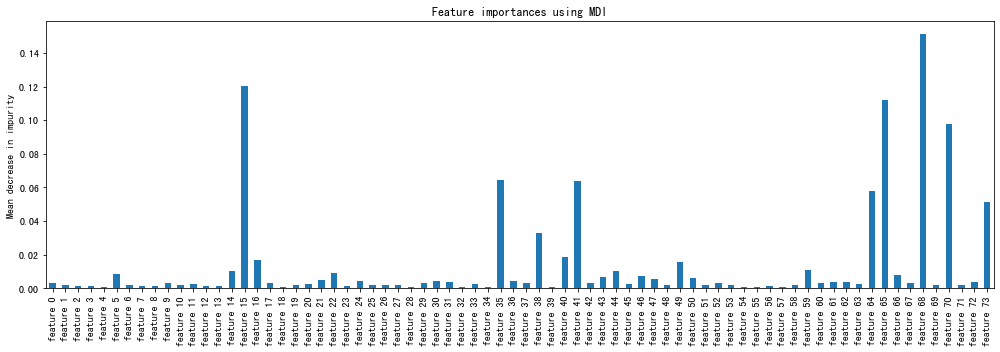

In [80]:
importances = rf_model_3.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(14, 5))
forest_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### Intepretation:
Mean Decrease in Impurity is a method based on decision trees and the calculation of impurity. This method finds the importance of a feature by calculating the reduction in impurity.

Graphing mean decrease in impurity, we can see there are a few features that have wider range. Higher number indicates the feature is more important in terms of making decisions.

In [81]:
# use Permutation Feature Importance
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf_model_3, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=feature_names)

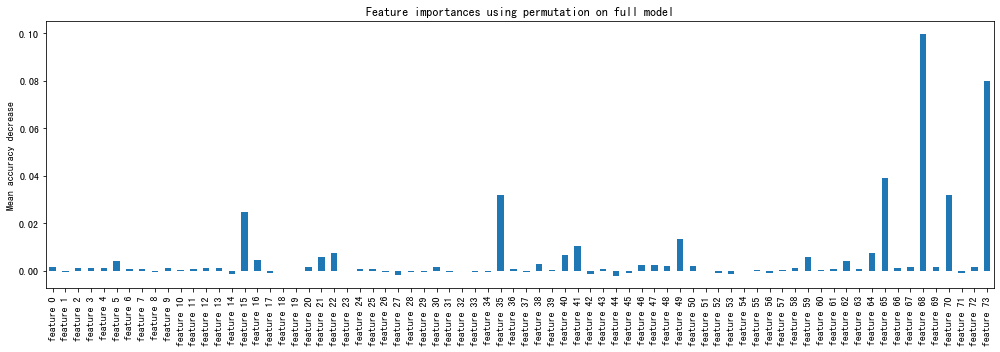

In [82]:
fig, ax = plt.subplots(figsize=(14, 5))
forest_importances.plot.bar()
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

#### Intepretation:
The results from Mean Decrease in Impurity and Permutation Feature Importance do not differ much. Nearly all the same features stood out from the rest. However, we notice a few differences.

Permutation Feature Importance is a method measuring the importance of variables by calculating the model performance when a variable is randomly permuted.

There are negative values for the permutation feature importance plot, and some features have different level of important according to the two different methods.

### 4. Use the same split to build lasso regression.  Compare with the last model.

In [83]:
# Compare the OOS performance with that of a LASSO Logistic Regression Model
from sklearn.linear_model import ElasticNet, Lasso, LassoCV, BayesianRidge, LassoLarsIC
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


X = data.drop(['Estimated Shares Outstanding'], axis=1)
y = data['Estimated Shares Outstanding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # same split


#Scaling the X values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Creating the lambda test values
alphas = np.logspace(-6, 0, 100)

#Creating 5 folds
k = 5
n = len(y_train)

#Shuffling the data
indices = np.arange(n)
np.random.shuffle(indices)

X_cv = X_train_scaled[indices]
y_cv = y_train.iloc[indices]

avg_rmse=[]
for alpha in alphas:
    rmse_list = []
    
    # Manual k-fold splitting
    for fold in range(k):
        # Calculating the size of each fold
        fold_size = n // k
        
        # Define the start and end indices of the test set
        start, end = fold * fold_size, (fold + 1) * fold_size
        
        test_indices = indices[start:end]
        train_indices = np.concatenate((indices[:start], indices[end:]))
        
        X_train_cv, X_test_cv = X_cv[train_indices], X_cv[test_indices]
        y_train_cv, y_test_cv = y_cv.iloc[train_indices], y_cv.iloc[test_indices]
        
        lasso = Lasso(alpha=alpha)
        
        lasso.fit(X_train_cv, y_train_cv)
        
        y_pred_cv = lasso.predict(X_test_cv)
        rmse = np.sqrt(mean_squared_error(y_test_cv, y_pred_cv))
        
        rmse_list.append(rmse)
        
    avg_rmse.append(np.mean(rmse_list))

#Finding the best alpha
best_alpha = alphas[np.argmin(avg_rmse)]
print(f"Best alpha: {best_alpha}")

lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"The R-sqaured is {r2} and the rmse is {rmse}")

Best alpha: 1.0
The R-sqaured is 0.7946781846880651 and the rmse is 441525277.212611


We can see that the lasso regression model results in a higher RSME, suggesting higher levels of residuals and less accurate prediction. Therefore, we can say the random forest model with 2 splits performs better than lasso regression.

## Decision Tree Classification  
### 5. Use the breast cancer dataset to build decision tree classifier to predict the diagnosis.  Split the data into 70% train and 30% test.

In [84]:
# Import cancer data
cancer = pd.read_csv("Cancer.csv")
cancer = cancer.drop(['Unnamed: 32', 'id'], axis = 1)
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [85]:
## Encode M and B in Diagnosis to 1 and 0
Diagnosis = {'M': 1,'B': 0}
cancer.diagnosis = [Diagnosis[item] for item in cancer.diagnosis]

In [86]:
# split data
X = cancer.drop(['diagnosis'], axis=1)
y = cancer['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


#Scaling the X values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# build decision tree classifier
regressor = DecisionTreeRegressor(max_depth=3) 
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

MSE: 0.07772197821200201


### 6. Print Confusion matrix and explain.

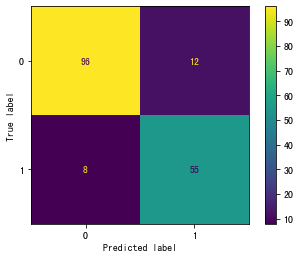

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions_m = (predictions > 0.5).astype(int)
matrix = confusion_matrix(y_test, predictions_m)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()

By looking at the confusion matrix, we can see that the decision tree model predicts the value correctly at about a 88.89% of the time when the true value is 0, and predicts value correctly 87.3% of the time when the true value is 1.

### 7. Visualize the tree.  What variables are in the plot?

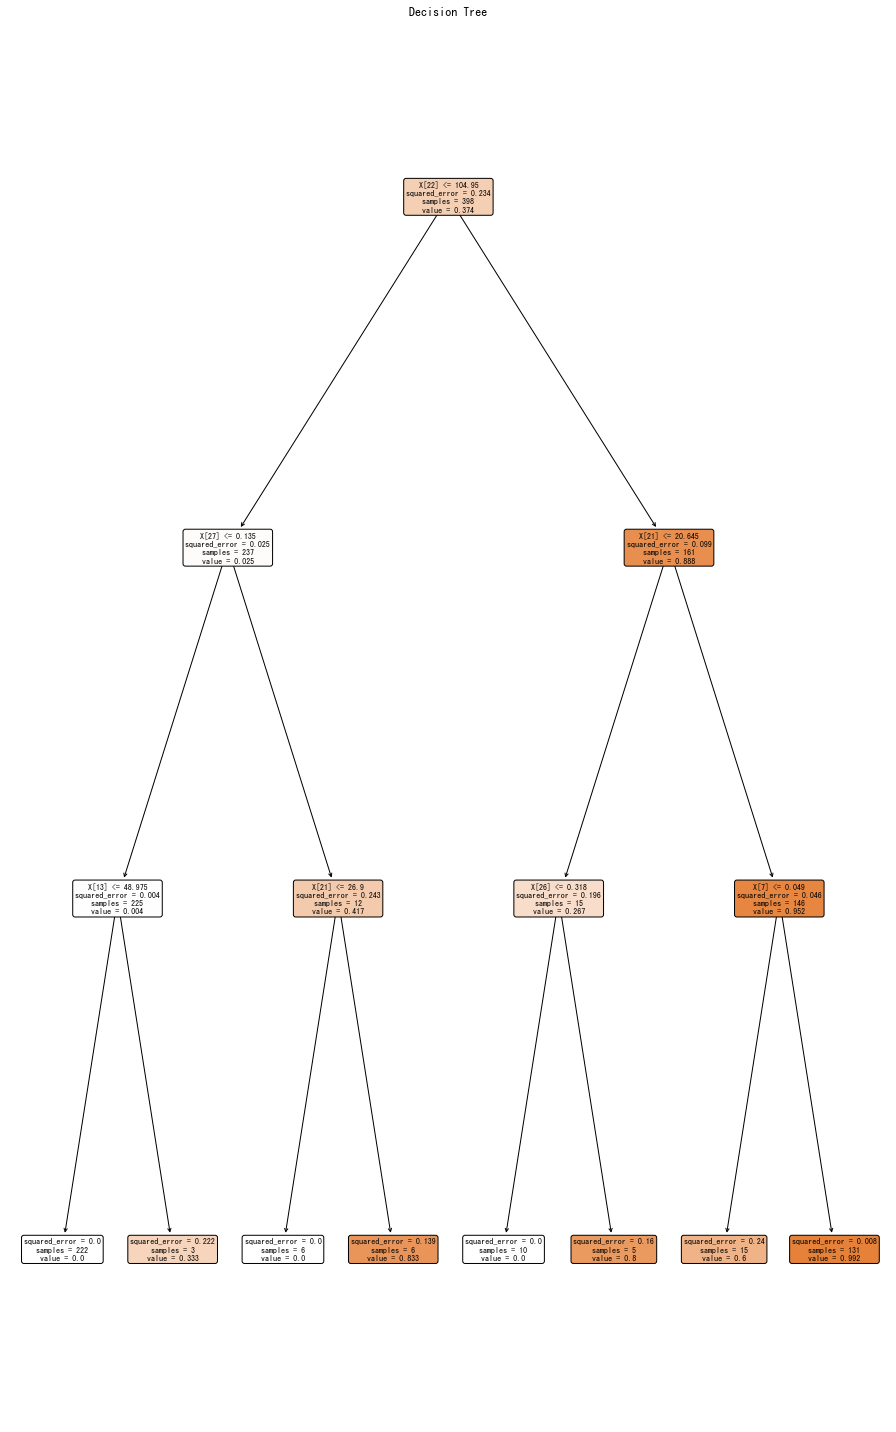

In [89]:
# Plot the decision tree
plt.figure(figsize=(25, 20))

# Subplot 1: The decision tree
plt.subplot(1, 2, 1)
plot_tree(regressor, filled=True, rounded=True,fontsize=8)
plt.title("Decision Tree")

# Display the plots
plt.tight_layout()
plt.show()

In [90]:
print("The following variables are in the plot:")
print("X[22]:", X.columns[22])
print("X[27]:", X.columns[27])
print("X[21]:", X.columns[21])
print("X[10]:", X.columns[10])
print("X[20]:", X.columns[20])
print("X[7]:", X.columns[7])

The following variables are in the plot:
X[22]: perimeter_worst
X[27]: concave points_worst
X[21]: texture_worst
X[10]: radius_se
X[20]: radius_worst
X[7]: concave points_mean


### 8. Would you consider pruning this tree?  Why?  Where? 

The idea of pruning the decision tree is to remove some leaves in order to aviod overfitting the decision tree model to the training data, causing the model fail to accurately fit the testing data. Looking at the decision tree above, we notice that some of the leaves have a relatively small sample size compared to the leaf sharing the same node. Therefore, we think it is better to prune those leaves and make the corresponding nodes leaves.

As a result, we prune the leaves decided by "x[10] <= 0.643" and "x[7] <= 0.049", and keep the other sets of leaves as they are.